In [11]:
# supervised_baseline.py
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
# Load the clustered dataset
data_path = '../optics_new/clustered_shots_with_predictions.csv'
shots_data = pd.read_csv(data_path)

In [13]:
# Define feature columns and target variable
categorical_columns = ['side', 'bodypart', 'assist_method', 'situation', 'fast_break', 'event_team', 'opponent']
numerical_columns = ['time', 'shot_outcome', 'location', 'is_goal']

In [14]:
# Preprocessing
X = shots_data[categorical_columns + numerical_columns]
y = shots_data['shot_place']

In [15]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ],
    remainder='drop'
)
X_processed = preprocessor.fit_transform(X)

In [16]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)


In [17]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [19]:
# Compute accuracy
supervised_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of supervised baseline: {supervised_accuracy:.4f}")

Accuracy of supervised baseline: 0.9130


<Figure size 1000x800 with 0 Axes>

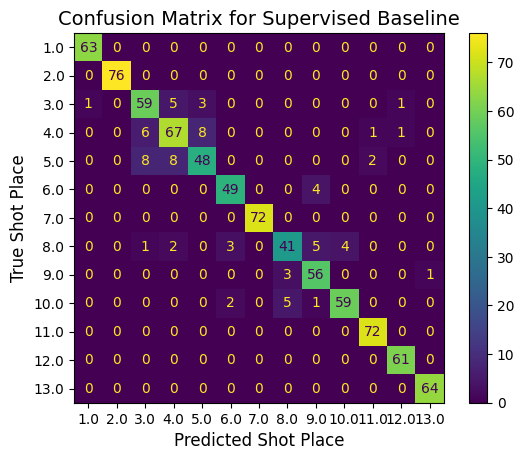

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix for Supervised Baseline', fontsize=14)
plt.xlabel('Predicted Shot Place', fontsize=12)
plt.ylabel('True Shot Place', fontsize=12)
plt.grid(False)
plt.show()

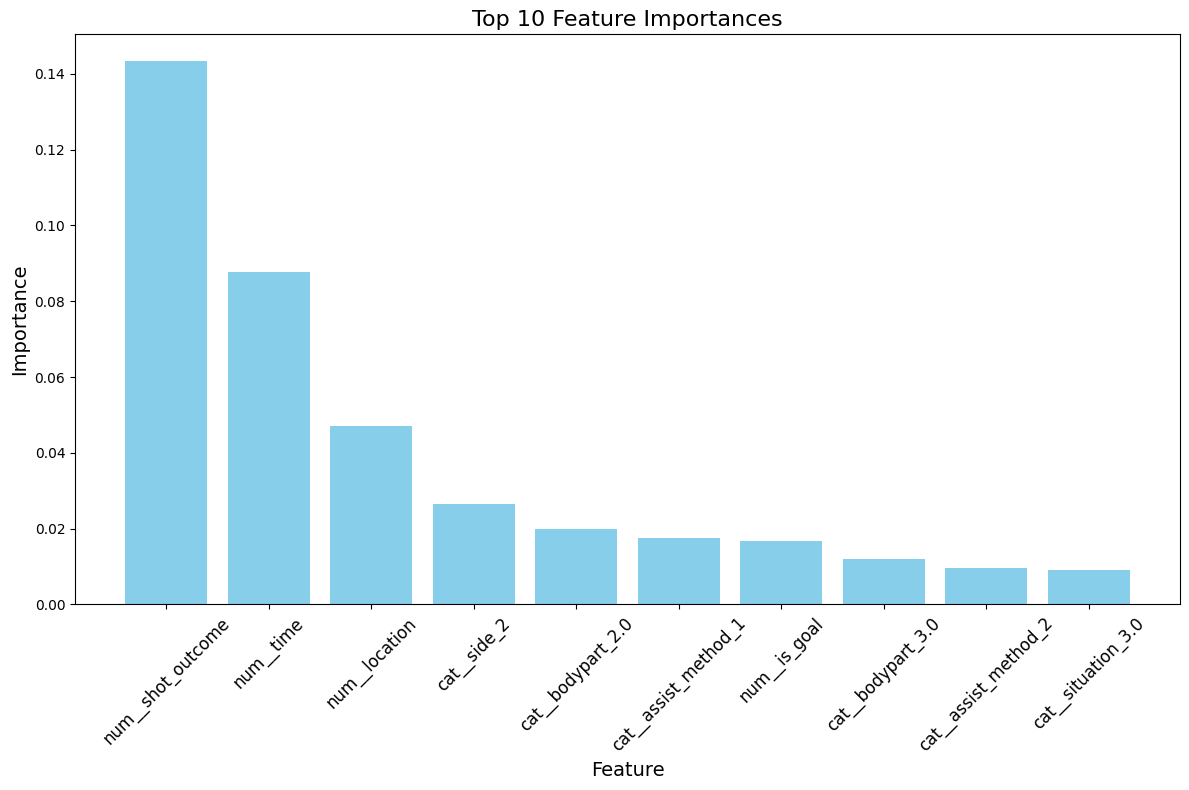

In [21]:
# Feature importance visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = preprocessor.get_feature_names_out()

plt.figure(figsize=(12, 8))
plt.bar(range(10), importances[indices[:10]], align='center', color='skyblue')
plt.xticks(range(10), feature_names[indices[:10]], rotation=45, fontsize=12)
plt.title('Top 10 Feature Importances', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.tight_layout()
plt.show()